In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# 1.Input Layer--CN/DenseLayer/Convoluted Layer
#     i. Relu Layer
#     ii.Pooling Layer  
#       iii.Upsampling 
     
#         i.batchNormalization
#         ii.Droupout Layer
#         
    
# 2.HiddenLayer --NN
# 3.Output Layer--FCNN

In [3]:
# 1.Tensorflow
# 2.Pytorch
# 3.MaxNet

# 1.Numpy
# 2.Pandas
# 3.Pillow
# 4.OpenCV
# 5. Scikit Learn

# i.plotly
# ii.matlplotlib
# iii.Seaborn
# iv.D3.js
# v.NLTK


In [4]:
# This section for model
import tensorflow as tf
#This section for algebric analysis
import numpy as np
# This section for visualisation
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
class NeuralNetwork:
    def __init__(self,layers):
        self.layers=layers
        self.L=len(layers)
        
        self.number_feature=layers[0]
        self.number_class= layers[-1]
        
        self.w ={}
        self.b ={}
        
        self.dw = {}
        self.db = {}
        
        self.setup()
    
    def setup(self):
        for i in range(1,self.L):
            self.w[i] = tf.Variable(tf.random.normal(shape= (self.layers[i],self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape= (self.layers[i],1)))
        

In [6]:
# 1.dtype="float32"
# 2.dtype=np.float32
# 3.dtype=tf.float32
# 4.dtype=torch.float32

In [7]:
# Forward propagation
class NeuralNetwork(NeuralNetwork):
    def forwardPass (self,A):
        A = tf.convert_to_tensor(A, dtype=tf.float32)
        for i in range(1,self.L):
            Z = tf.matmul(A, tf.transpose(self.w[i])) + tf.transpose(self.b[i])
            if i!= self.L-1:
                A = tf.nn.relu(Z)
            else:
                A=Z
        return A       

In [8]:
# We will use this section for computing loss and Upgrading the previous parameters
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, A,Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y,A))
    
    def upgrade_parameters(self, lr):
        for j in range(1,self.L):
            self.w[j].assign_sub(lr*self.dw[j])
            self.b[j].assign_sub(lr*self.db[j])

In [9]:
class NeuralNetwork(NeuralNetwork):
    def predict(self, x):
        A = self.forwardPass(x)
        return tf.argmax(tf.nn.softmax(A), axis = 1)
    def info(self):
        num_params = 0
        for i in range(1,self.L):
            num_params += self.w[i].shape[0]*self.w[i].shape[1]
            num_params += self.b[i].shape[0]
            
        print("Number of Feature: {}".format(self.number_feature))
        print("Total Number of Class is: {}". format(self.number_class))
        
        print("Hidden Layer information is:")
        for j in range(1,self.L-1):
            print("Layer: {}, Units {}".format(j,self.layers[j]))
            
        print ("Total Number of parameters : {}". format(num_params))    

In [10]:
class NeuralNetwork(NeuralNetwork):
    def training_on_batch(self,x,y,lr):
        x= tf.convert_to_tensor(x, dtype=tf.float32)
        y= tf.convert_to_tensor(y, dtype=tf.float32)
        
        
        with tf.GradientTape(persistent = True) as tape:
            A = self.forwardPass(x)
            loss = self.compute_loss(A, y)
            
        for key in self.w.keys():
            self.dw[key] = tape.gradient(loss, self.w[key])
            self.db[key] = tape.gradient(loss, self.b[key])
            
            
        del tape
        
        self.upgrade_parameters(lr)
        return loss.numpy()

In [11]:
# Training Start
class NeuralNetwork(NeuralNetwork):
    def train(self,x_train,y_train,x_test,y_test, epochs, step_per_epochs, batch_size, lr):
        history = {"val_loss":[],
                  'train_loss':[],
                  'val_acc':[]}
        
        for e in range(0, epochs):
            epochs_loss_train = 0.0
            print("Epochs {}". format(e),end = " | ")
            for i in range(step_per_epochs):
                x_batch = x_train[i*batch_size : (i+1)*batch_size]
                y_batch = y_train[i*batch_size : (i+1)*batch_size]
                batch_loss = self.training_on_batch(x_batch, y_batch, lr)
                epochs_loss_train += batch_loss
                
                
        
                if i %int(step_per_epochs/10) ==0:
                    print(end = " . ")
                    
            
            
            history['train_loss'].append(epochs_loss_train/step_per_epochs)   


            valA = self.forwardPass(x_test)   
            history['val_loss'].append(self.compute_loss(y_test, valA).numpy())


            valuePr = self.predict(x_test)
            history['val_acc'].append(np.mean(np.argmax(y_test, axis = 1)== valuePr.numpy()))
            print("value Accuracy:", history['val_acc'][-1])

    # Here We will get training information
    
        return history
            

In [12]:
def loadDatasets():
    (x_train, y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0],784))/255.0
    y_train = tf.keras.utils.to_categorical(y_train)
    x_test = np.reshape(x_test,(x_test.shape[0],784))/255.0
    y_test = tf.keras.utils.to_categorical(y_test)
    
    print("X Train Datasets Shape: {}". format(x_train.shape))
    print("Y test Data {}".format(y_test))
    print ("Len of Y test Datasets:{}".format(len(y_test[0])))
   # print("Unique Value is :{}".format(np.unique(y_test[0]))) 
    print("Unique Value is :{}".format(np.argmax(y_test[7])))
    return (x_train, y_train), (x_test, y_test)


def plot_random_sample(x,y,p= None):
    indicies = np.random.choice(range(0,x.shape[0]),10)
    y=np.argmax(y, axis=1)
    
    
    if p is None:
        p = y
        
    plt.figure(figsize=(10,4)) 
    for i, index in enumerate(indicies):
        plt.subplot(2,5, i+1)
        plt.imshow(x[index].reshape((28,28)), cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        plt.gray()
        
        
        if y[index]== p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color = col)
            
            
    return plt       
    
    

In [13]:
(x_train, y_train),(x_test,y_test)=loadDatasets()

11501568/11490434 [==============================] - 1s 0us/step
X Train Datasets Shape: (60000, 784)
Y test Data [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Len of Y test Datasets:10
Unique Value is :9


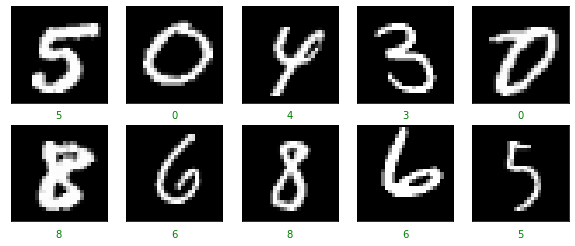

In [14]:
plot_random_sample(x_train,y_train).show()

In [15]:
network = NeuralNetwork([784,256,256,10])

2022-11-07 07:17:51.192003: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
network.info()

Number of Feature: 784
Total Number of Class is: 10
Hidden Layer information is:
Layer: 1, Units 256
Layer: 2, Units 256
Total Number of parameters : 269322


In [17]:
batch_size = 128
epochs = 20
step_per_epochs = int(x_train.shape[0]/batch_size)

In [18]:
x_train.shape[0]//128

468

In [19]:
learning_rate = 3e-6

In [20]:
history = network.train(x_train,y_train,x_test,y_test, epochs, step_per_epochs, batch_size, learning_rate)

Epochs 0 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.1837
Epochs 1 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.1936
Epochs 2 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.2097
Epochs 3 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.2266
Epochs 4 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.2447
Epochs 5 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.26
Epochs 6 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.274
Epochs 7 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.2872
Epochs 8 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.3007
Epochs 9 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.3132
Epochs 10 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.3262
Epochs 11 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.3396
Epochs 12 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.3511
Epochs 13 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 0.3645
Epochs 14 |  .  .  .  .  .  .  .  .  .  .  . value Accuracy: 

In [21]:
def plot_results(history):
    plt.figure(figsize=(12,4))
    epochs = len(history['val_loss'])
    plt.subplot(1,2,1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend() 
    
    
    plt.subplot(1,2,2)
    plt.plot(range(epochs), history['val_acc'], label = 'Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

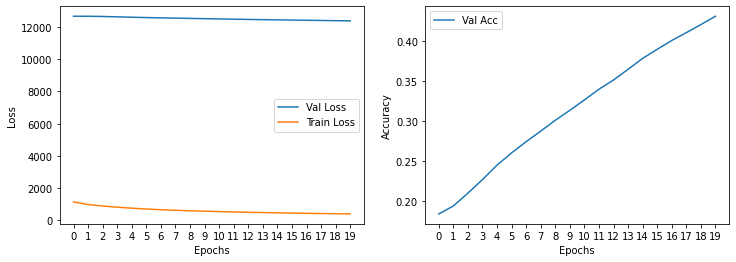

In [22]:
plot_results(history).show()

In [23]:
pred = network.predict(x_test)

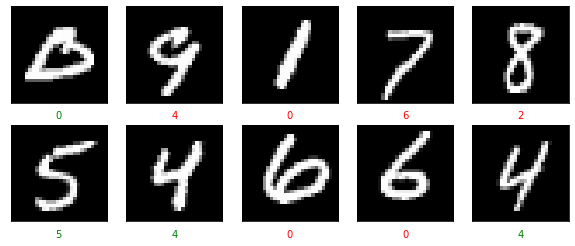

In [24]:
plot_random_sample(x_test,y_test,pred.numpy()).show()